In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [51]:
path = "cat_dog_2"

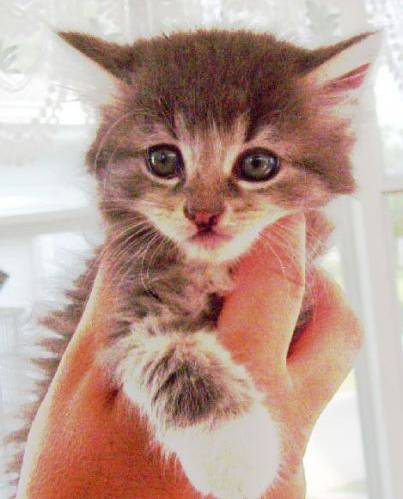

In [8]:
from tensorflow.keras.preprocessing.image import load_img

load_img(f"{path}/training_set/cat/cat.100.jpg")

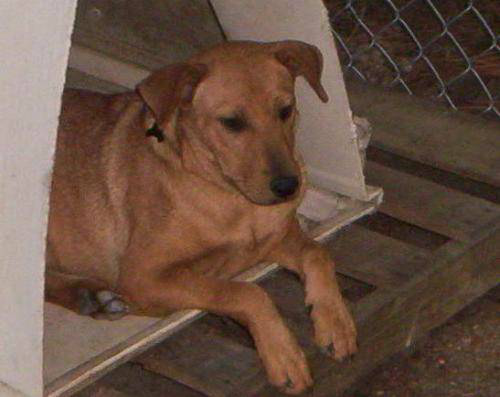

In [9]:
load_img(f"{path}/training_set/dog/dog.100.jpg")

In [10]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range = 7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)

In [11]:
train_dataset = training_generator.flow_from_directory(f"{path}/training_set",
                                                       target_size = (64,64),
                                                       batch_size = 8,
                                                       class_mode = "categorical",
                                                       shuffle = True)

Found 4000 images belonging to 2 classes.


In [12]:
train_dataset.classes[:5]

array([0, 0, 0, 0, 0], dtype=int32)

In [13]:
train_dataset.class_indices

{'cat': 0, 'dog': 1}

In [14]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(f"{path}/test_set",
                                                  target_size = (64,64),
                                                  batch_size = 1,
                                                  class_mode = "categorical",
                                                  shuffle = False)

Found 1000 images belonging to 2 classes.


In [15]:
test_dataset.classes[:5]

array([0, 0, 0, 0, 0], dtype=int32)

In [16]:
test_dataset.class_indices

{'cat': 0, 'dog': 1}

In [28]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=577,activation="relu")) # (input+output)/2
model.add(Dense(units=577,activation="relu"))
model.add(Dense(units=2,activation="softmax"))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)             

In [29]:
model.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [30]:
h = model.fit(train_dataset,epochs=50)

Epoch 1/50
500/500 [==============================] - 21s 41ms/step - loss: 0.6920 - accuracy: 0.5303
Epoch 2/50
500/500 [==============================] - 20s 39ms/step - loss: 0.6815 - accuracy: 0.5725
Epoch 3/50
500/500 [==============================] - 18s 37ms/step - loss: 0.6659 - accuracy: 0.6097
Epoch 4/50
500/500 [==============================] - 19s 38ms/step - loss: 0.6309 - accuracy: 0.6525
Epoch 5/50
500/500 [==============================] - 19s 37ms/step - loss: 0.6038 - accuracy: 0.6777
Epoch 6/50
500/500 [==============================] - 19s 37ms/step - loss: 0.5705 - accuracy: 0.7080
Epoch 7/50
500/500 [==============================] - 21s 42ms/step - loss: 0.5588 - accuracy: 0.7230
Epoch 8/50
500/500 [==============================] - 22s 44ms/step - loss: 0.5410 - accuracy: 0.7250
Epoch 9/50
500/500 [==============================] - 22s 45ms/step - loss: 0.5154 - accuracy: 0.7462
Epoch 10/50
500/500 [==============================] - 22s 44ms/step - loss: 0.506

In [31]:
predictions = model.predict(test_dataset)
predictions = np.argmax(predictions,axis=1)
predictions[:3]

array([1, 0, 1])

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy_score(test_dataset.classes,predictions)

0.756

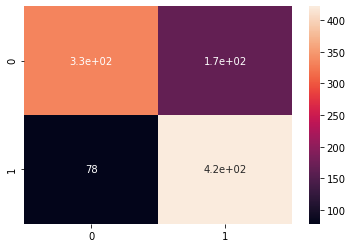

In [33]:
cm = confusion_matrix(test_dataset.classes,predictions)
sns.heatmap(cm,annot=True);

In [34]:
print(classification_report(test_dataset.classes,predictions))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73       500
           1       0.72      0.84      0.78       500

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.75      1000
weighted avg       0.76      0.76      0.75      1000



#### Save by using Keras

In [35]:
model.save("models/cnn_cat_dog.h5")

In [36]:
loaded_model = load_model("models/cnn_cat_dog.h5")
predictions = loaded_model.predict(test_dataset)
predictions = np.argmax(predictions,axis=1)
accuracy_score(test_dataset.classes,predictions)

0.756

#### Save by using json

In [37]:
from tensorflow.keras.models import save_model,model_from_json

model_json = model.to_json()
with open("models/cnn_cat_dog.json","w") as json_file:
    json_file.write(model_json)
model_saved = save_model(model,"models/cnn_weights.hdf5")

In [38]:
with open("models/cnn_cat_dog.json","r") as json_file:
    loaded_json_model = json_file.read()

In [39]:
loaded_model = model_from_json(loaded_json_model)
loaded_model.load_weights("models/cnn_weights.hdf5")

In [40]:
predictions = loaded_model.predict(test_dataset)
predictions = np.argmax(predictions,axis=1)
accuracy_score(test_dataset.classes,predictions)

0.756

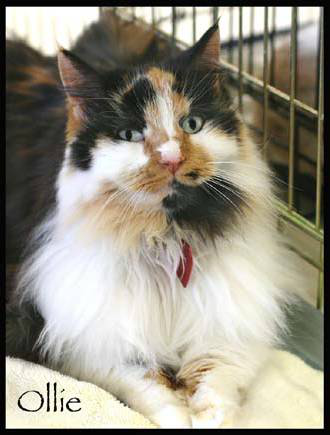

In [48]:
image_path = "cat_dog_2/test_set/cat/cat.3560.jpg"
load_img(image_path)

In [49]:
image = cv2.imread(image_path)
image = cv2.resize(image,(64,64))
image = image.reshape(1,64,64,3) # Add batch

In [50]:
result = model.predict(image)
result = np.argmax(result,axis=1)
if result[0]==1:
    print("Dog")
else:
    print("Cat")

Cat
